In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
df = pd.read_csv(r'D:\Learn Python for Data Analysis\PYTHON_EXERCISES_LUKE\job_postings_flat_from_luke.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda skills: ast.literal_eval(skills) if pd.notna(skills) else skills)

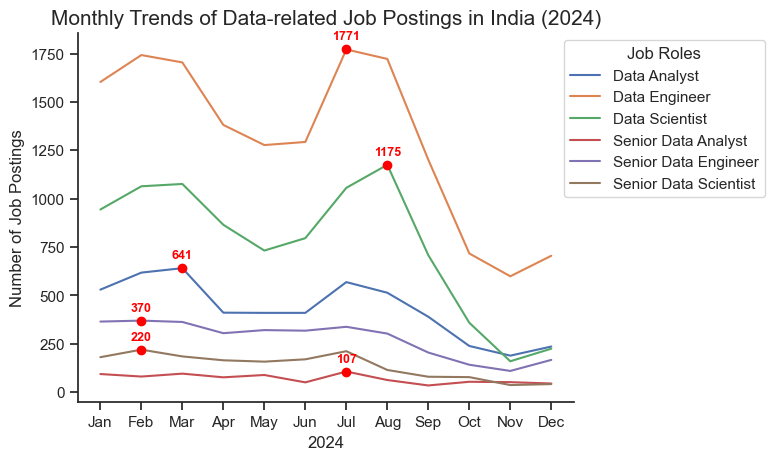

In [ ]:
from adjustText import adjust_text

df_Data_IN_2024 = (df[
    (df['job_posted_date'].dt.year == 2024) &
    (df['job_country'] == 'India') &
    (df['job_title_short'].str.contains('Data', case=False))
    ].copy()
)

df_Data_IN_2024['job_posted_month_no'] = df_Data_IN_2024['job_posted_date'].dt.month

df_pivot = df_Data_IN_2024.pivot_table(
    index='job_posted_month_no',
    columns='job_title_short',
    aggfunc='size'
)

df_pivot = df_pivot.reset_index()
df_pivot['job_posted_month'] = pd.to_datetime(df_pivot['job_posted_month_no'], format='%m').dt.strftime('%b')
df_pivot.set_index('job_posted_month', inplace=True)
df_pivot.drop(columns='job_posted_month_no', inplace=True)

sns.set_theme(style='ticks')

ax = sns.lineplot(data=df_pivot, dashes=False)
sns.despine()

plt.title('Monthly Trends of Data-related Job Postings in India (2024)', fontsize=15)
plt.xlabel('2024')
plt.ylabel('Number of Job Postings')
plt.legend(
    title='Job Roles',
    loc='upper right',
    bbox_to_anchor=(1.4, 1)
)

# Find the max value for each job role
for job_role in df_pivot.columns:
    y_max1 = df_pivot[job_role].max()
    x_max1 = df_pivot[job_role].idxmax()

    ax.scatter(x_max1, y_max1, color='red', zorder=5)
    ax.text(x_max1, y_max1 + 50, y_max1, ha='center', color='red', fontsize=9, fontweight='bold')

plt.show()